### EDA

In [2]:
import os
import gc
import random
import requests
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
from wordcloud import WordCloud, STOPWORDS

import warnings
warnings.simplefilter('ignore')

#### load data

In [5]:
train = pd.read_csv('./dataset/train.csv')
test = pd.read_csv('./dataset/test.csv')

#### Score

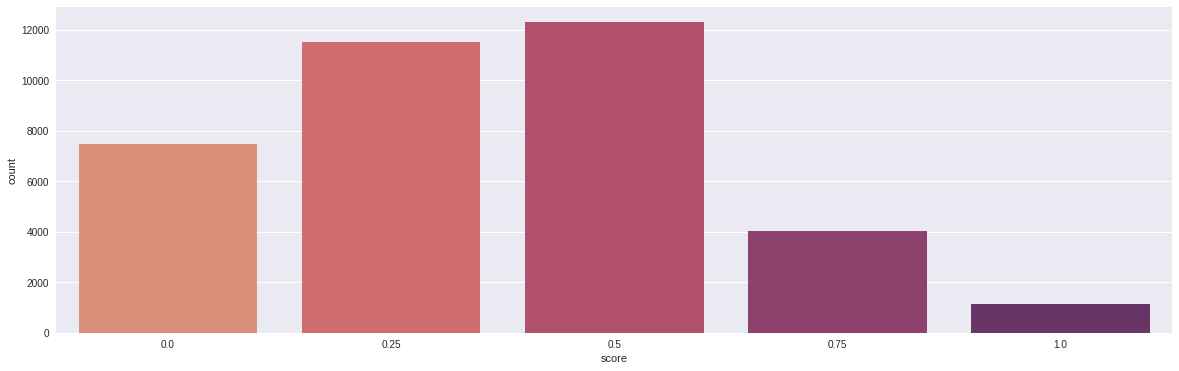

In [6]:
plt.figure(figsize=(20, 6))
sns.countplot(x='score', data=train, palette='flare')

#### Anchor

Text(0.5, 1.0, 'Top 50 First Phrases (Anchor)')

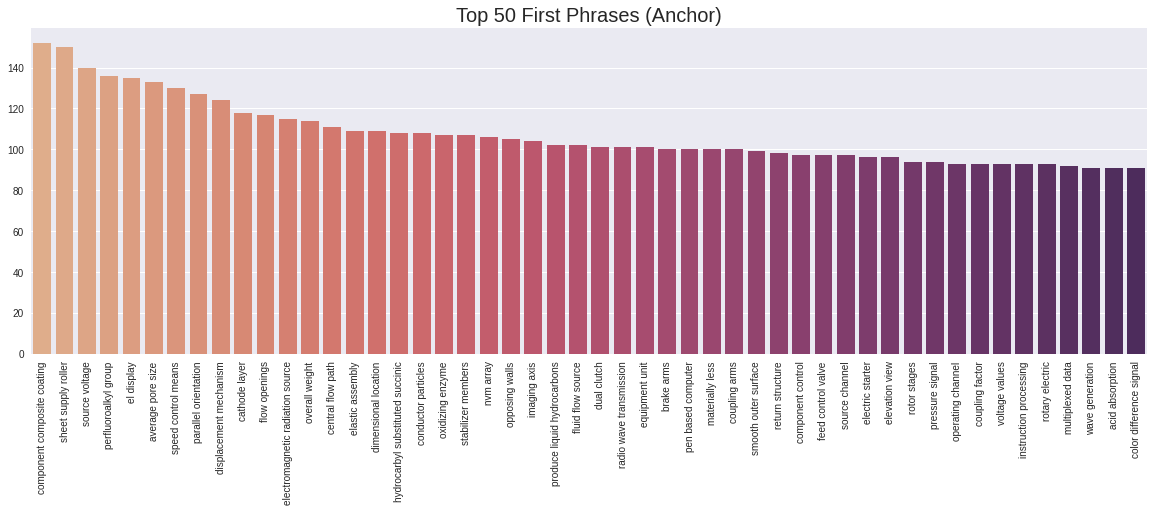

In [7]:
count_anchors = dict(train.anchor.value_counts().head(50))
plt.figure(figsize=(20, 6))
sns.barplot(x=list(count_anchors.keys()), y=list(count_anchors.values()), palette='flare')
plt.xticks(rotation=90)
plt.title("Top 50 First Phrases (Anchor)", fontsize=20)

Text(0.5, 1.0, 'Word Count Distribution')

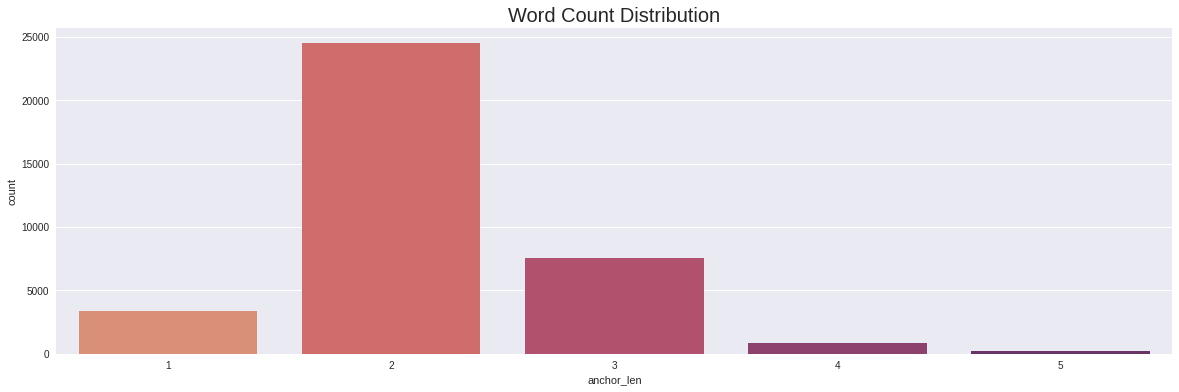

In [8]:
plt.figure(figsize=(20, 6))
train['anchor_len'] = train['anchor'].str.split().str.len()
sns.countplot(x='anchor_len', data=train, palette='flare')
plt.title("Word Count Distribution", size=20)

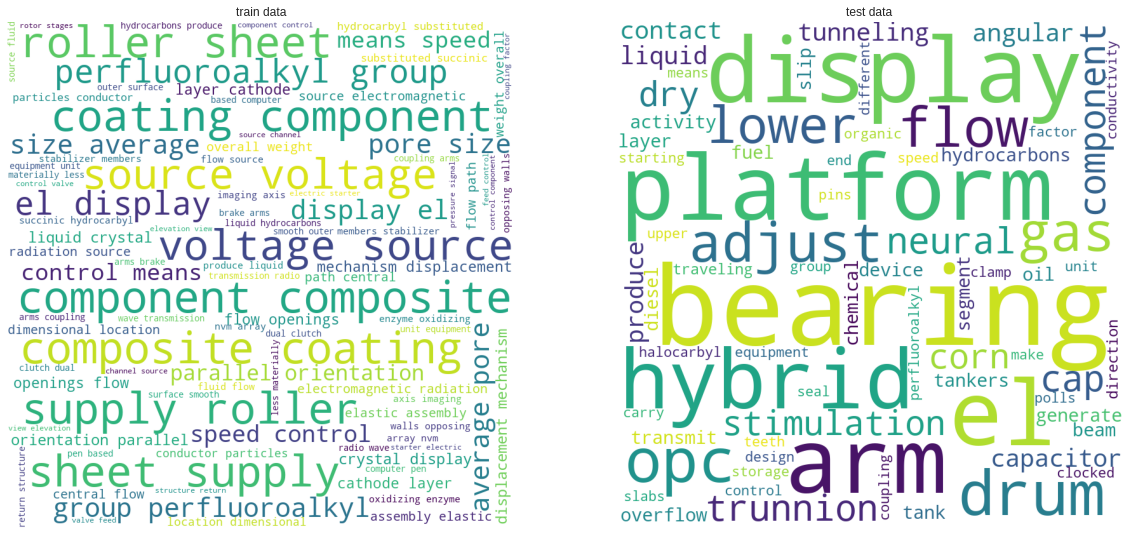

In [9]:
anchor_desc_tr = train[train.anchor.notnull()].anchor.values
stopwords_tr = set(STOPWORDS) 
wordcloud_tr = WordCloud(width = 800, 
                      height = 800,
                      background_color ='white',
                      min_font_size = 10,
                      stopwords = stopwords_tr,).generate(' '.join(anchor_desc_tr))
anchor_desc_te = test[test.anchor.notnull()].anchor.values
stopwords_te = set(STOPWORDS) 
wordcloud_te = WordCloud(width = 800, 
                      height = 800,
                      background_color ='white',
                      min_font_size = 10,
                      stopwords = stopwords_te,).generate(' '.join(anchor_desc_te))
fig = plt.figure(figsize=(20, 16))
ax1 = fig.add_subplot(121)  
ax1.imshow(wordcloud_tr) 
ax1.axis("off") 
plt.title('train data')
ax2 = fig.add_subplot(122)  
ax2.imshow(wordcloud_te) 
ax2.axis("off") 
plt.title('test data')
plt.show()

#### Target

Text(0.5, 1.0, 'Top 50 First Phrases (Target)')

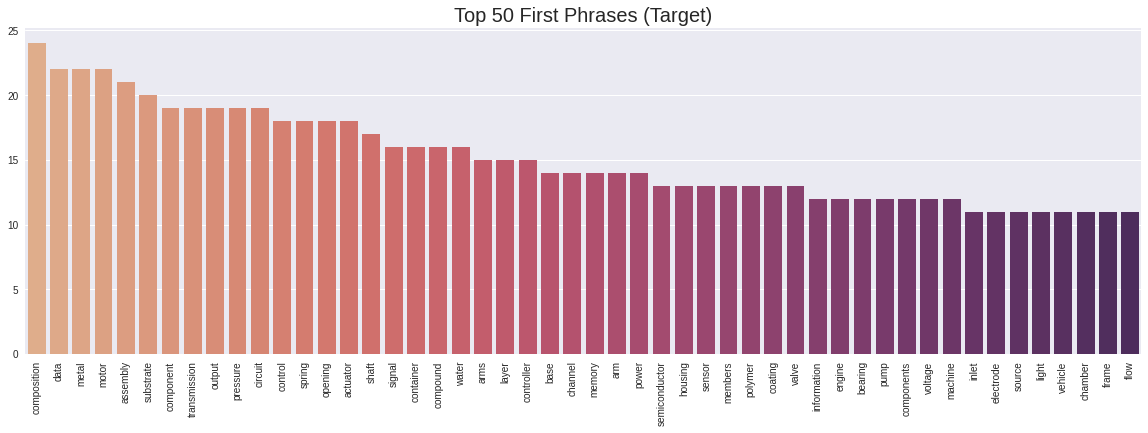

In [10]:
count_anchors = dict(train.target.value_counts().head(50))
plt.figure(figsize=(20, 6))
sns.barplot(x=list(count_anchors.keys()), y=list(count_anchors.values()), palette='flare')
plt.xticks(rotation=90)
plt.title("Top 50 First Phrases (Target)", fontsize=20)

Text(0.5, 1.0, 'Word Count Distribution')

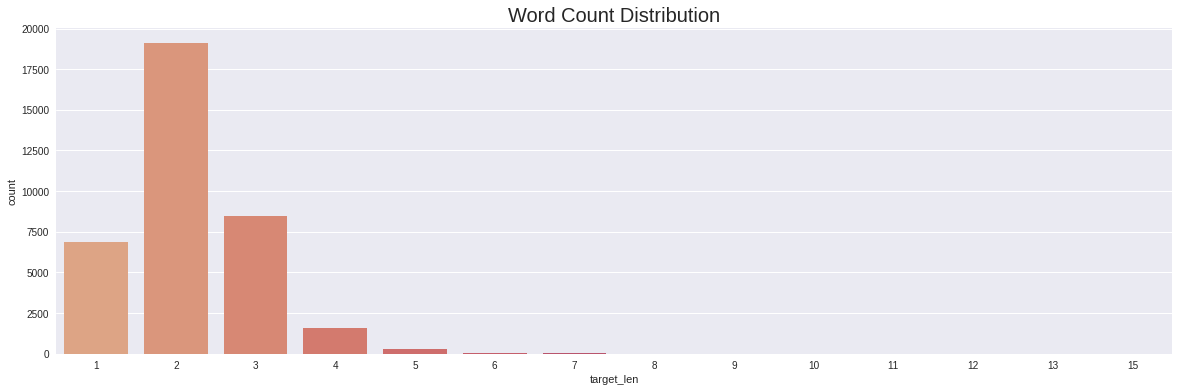

In [11]:
plt.figure(figsize=(20, 6))
train['target_len'] = train['target'].str.split().str.len()
sns.countplot(x='target_len', data=train, palette='flare')
plt.title("Word Count Distribution", size=20)

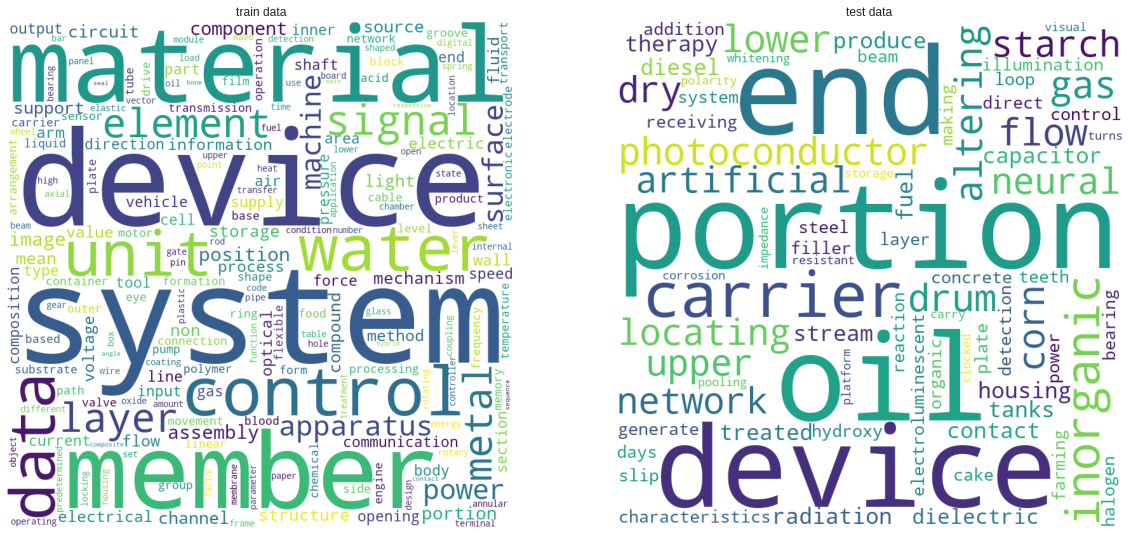

In [12]:
target_desc_tr = train[train.target.notnull()].target.values
stopwords_tr = set(STOPWORDS) 
wordcloud_tr = WordCloud(width = 800, 
                      height = 800,
                      background_color ='white',
                      min_font_size = 10,
                      stopwords = stopwords_tr,).generate(' '.join(target_desc_tr))
target_desc_te = test[test.target.notnull()].target.values
stopwords_te = set(STOPWORDS) 
wordcloud_te = WordCloud(width = 800, 
                      height = 800,
                      background_color ='white',
                      min_font_size = 10,
                      stopwords = stopwords_te,).generate(' '.join(target_desc_te))
fig = plt.figure(figsize=(20, 16))
ax1 = fig.add_subplot(121)  
ax1.imshow(wordcloud_tr) 
ax1.axis("off") 
plt.title('train data')
ax2 = fig.add_subplot(122)  
ax2.imshow(wordcloud_te) 
ax2.axis("off") 
plt.title('test data')
plt.show()

#### Context

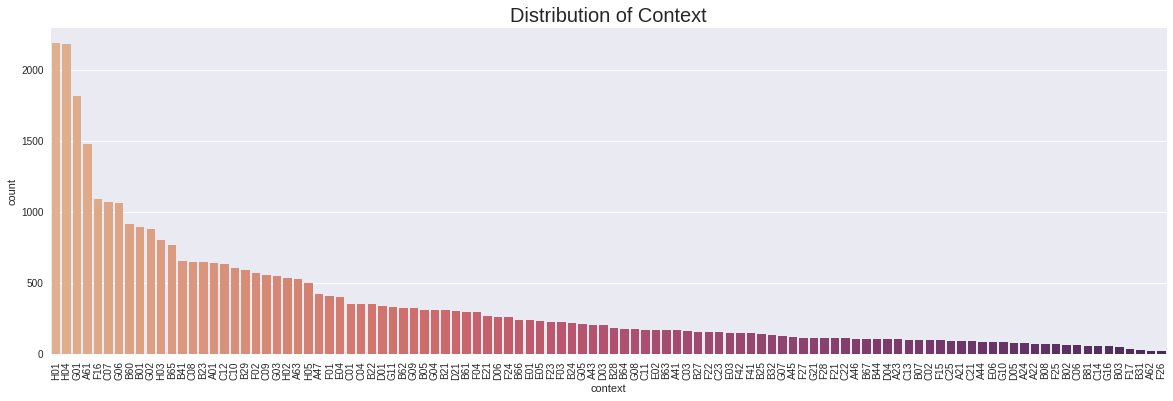

In [13]:
plt.figure(figsize=(20, 6))

sns.countplot(x='context', data=train, palette='flare', order = train['context'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Distribution of Context", fontsize=20)

plt.show()

**Contexts have the following meaning:**

A:HumanNecessities

B:OperationsandTransport

C:ChemistryandMetallurgy

D:Textiles

E:FixedConstructions

F:MechanicalEngineering

G:Physics

H:Electricity

Y:Emerging Cross-Sectional Technologies

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

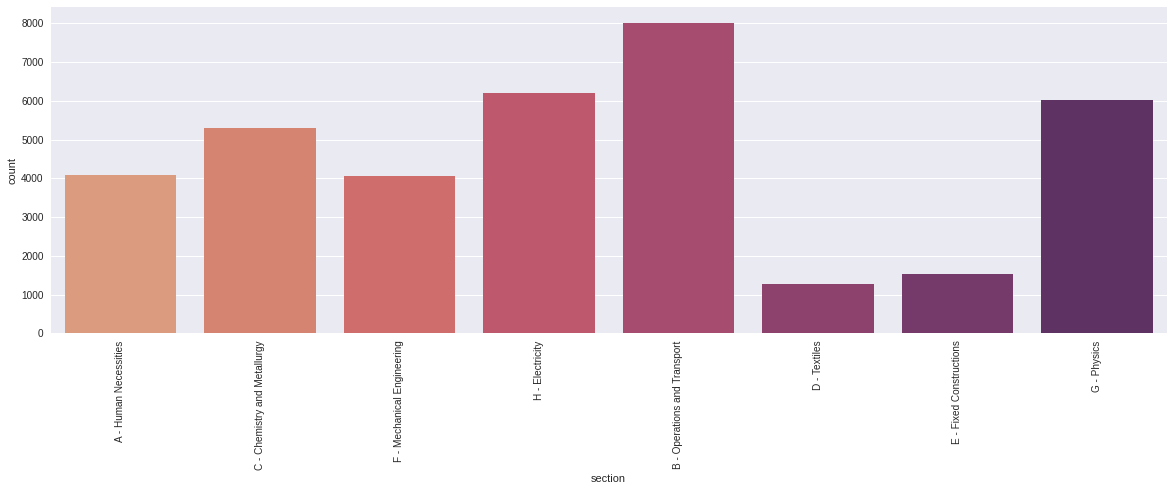

In [14]:
train['section'] = train['context'].astype(str).str[0]
di = {"A" : "A - Human Necessities", 
      "B" : "B - Operations and Transport",
      "C" : "C - Chemistry and Metallurgy",
      "D" : "D - Textiles",
      "E" : "E - Fixed Constructions",
      "F" : "F - Mechanical Engineering",
      "G" : "G - Physics",
      "H" : "H - Electricity",
      "Y" : "Y - Emerging Cross-Sectional Technologies"}

train = train.replace({"section": di})

plt.figure(figsize=(20, 6))

sns.countplot(x='section', data=train, palette='flare')
plt.xticks(rotation=90)